# ECE 4424 Final Project, Part 2 - Naive Bayes Approach
## Trevor Lew - trevllew751

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the Dataset

In [ ]:
file_path = "/content/drive/MyDrive/Spring Semester 2021-2022/ECE 4424 - Machine Learning/Final Project/Data/features_30_sec.csv"
features = pd.read_csv(file_path)

(1000, 60)

## Viewing the Correlation of the Data

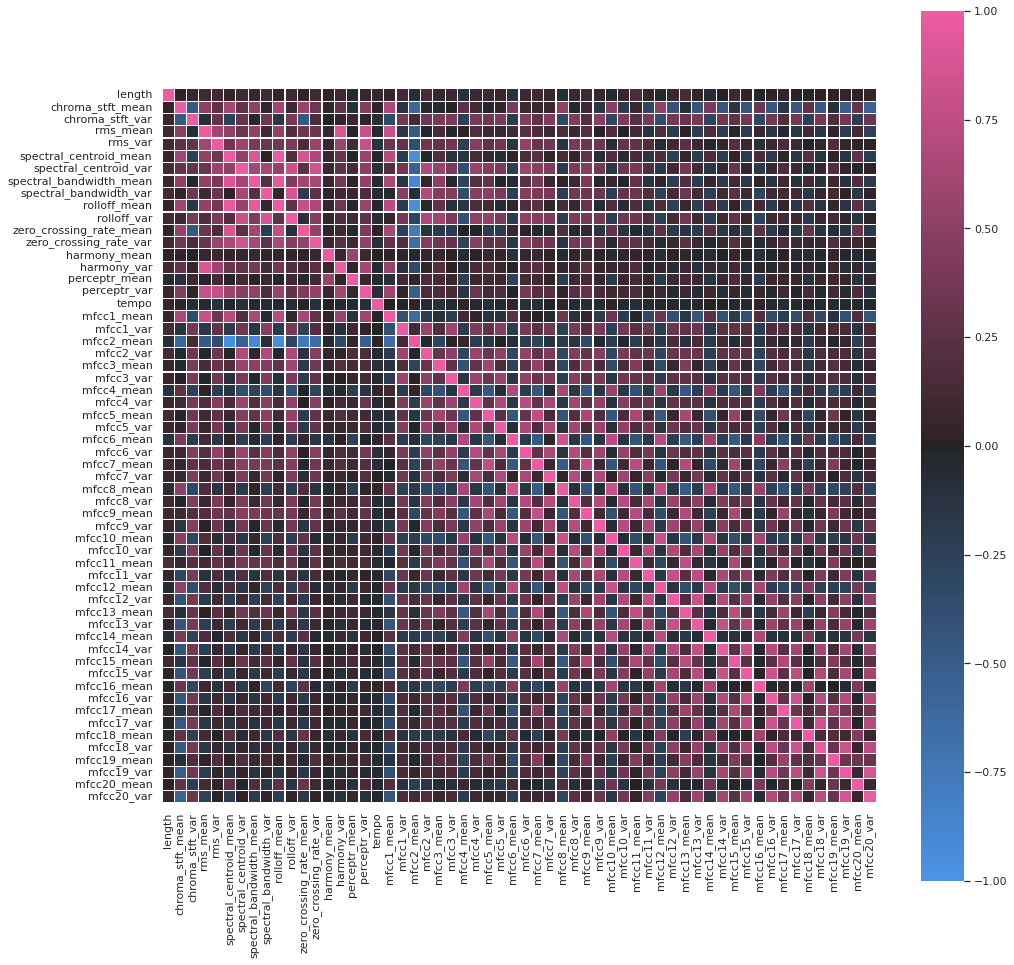

In [ ]:
corr = features.corr(method="pearson")
cmap = sns.diverging_palette(250, 345, 80, 60, center="dark", as_cmap=True)
sns.set(rc = {'figure.figsize':(16,16)})
sns.heatmap(corr, vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=.2)

## Dropping Strongly Correlated Features

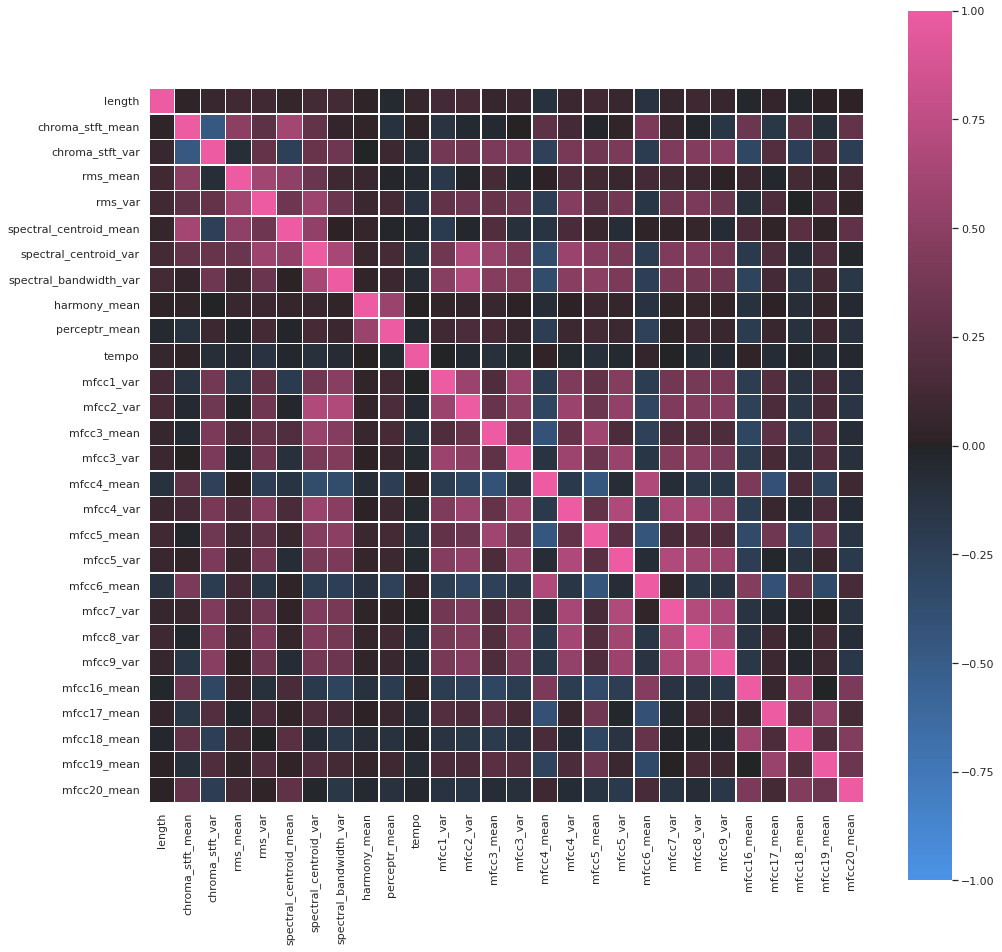

In [ ]:
threshold = 0.7

corr_matrix = features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
updated_features = features.drop(columns=to_drop, axis=1)
corr = updated_features.corr(method="pearson")
sns.heatmap(corr, vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=.2)

## Normalizing the Features

In [ ]:
norm_features = updated_features.copy()
norm_features = (norm_features - norm_features.mean()) / norm_features.std()
norm_features.drop(columns=["filename", "label", "length"], inplace=True)
norm_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,chroma_stft_mean,chroma_stft_var,harmony_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc1_var,mfcc20_mean,mfcc2_var,...,mfcc7_var,mfcc8_var,mfcc9_var,perceptr_mean,rms_mean,rms_var,spectral_bandwidth_var,spectral_centroid_mean,spectral_centroid_var,tempo
0,-0.349962,0.312431,0.190408,-0.086353,0.500212,-0.236922,0.006720,-0.427231,0.603762,-0.935930,...,-0.834015,-0.469360,-0.161106,0.372570,-0.010684,-0.061825,-0.530776,-0.583293,-0.847887,0.125300
1,-0.462250,1.117013,0.300196,-0.048078,0.711015,-0.054954,0.544533,1.449773,0.423915,-0.333939,...,1.446611,1.324222,1.963373,0.201226,-0.532586,-0.186727,0.795854,-0.938046,-0.234077,-1.822299
2,-0.184132,-0.137632,0.218557,0.284682,-0.827102,-0.600682,-0.295786,-0.154781,-0.296041,-0.451208,...,-0.160705,0.447666,-0.585379,0.347386,0.679638,-0.084051,-0.630600,-0.906431,-0.781303,1.485756
3,0.319479,0.990164,0.217579,-0.080208,0.142082,0.033410,0.455181,0.635122,-0.602579,-0.570218,...,0.677141,-0.168710,0.089815,0.351991,0.154732,0.906575,0.304413,-1.580638,-0.711739,-1.998337
4,-0.858647,0.194066,0.206878,-1.237996,-0.327056,-0.368191,-0.552740,0.522428,-2.764625,0.334499,...,-0.395718,0.888544,1.050953,0.356030,-0.599865,-0.205806,-0.504210,-0.512286,-0.315021,0.583559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.325794,-0.756631,0.218451,0.140146,-2.049357,0.510828,-1.167347,-0.435626,-0.025655,-0.572325,...,-0.463845,-1.081876,-0.274533,0.354051,-0.783214,-0.744596,-0.502504,-0.270450,-0.467740,-0.571253
996,0.244853,-1.454916,0.216472,0.565823,-1.512690,0.355000,-1.366557,-0.168023,-0.443051,-0.822965,...,-0.897619,-1.079487,-1.302664,0.354144,-0.829308,-0.677726,-0.566614,-0.272274,-0.717329,-0.072584
997,0.654310,-1.431273,0.217017,0.150678,-1.951616,0.758129,-2.731477,-0.745783,-0.263484,-0.527900,...,-0.965359,-1.132484,-1.114418,0.352064,-0.750250,-0.750874,-0.646536,-0.173549,-0.593749,0.342973
998,-0.198239,0.667809,0.217781,-0.864898,-0.098913,0.270996,-0.722356,2.533241,-0.650323,-0.487521,...,-0.159200,0.364746,-0.470399,0.353653,-0.716619,-0.506365,-0.290174,-1.121684,-0.572145,-1.616082


## Visualizing Feature Histograms to Best Discretize the Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facd6bf4310>,
      dtype=object)

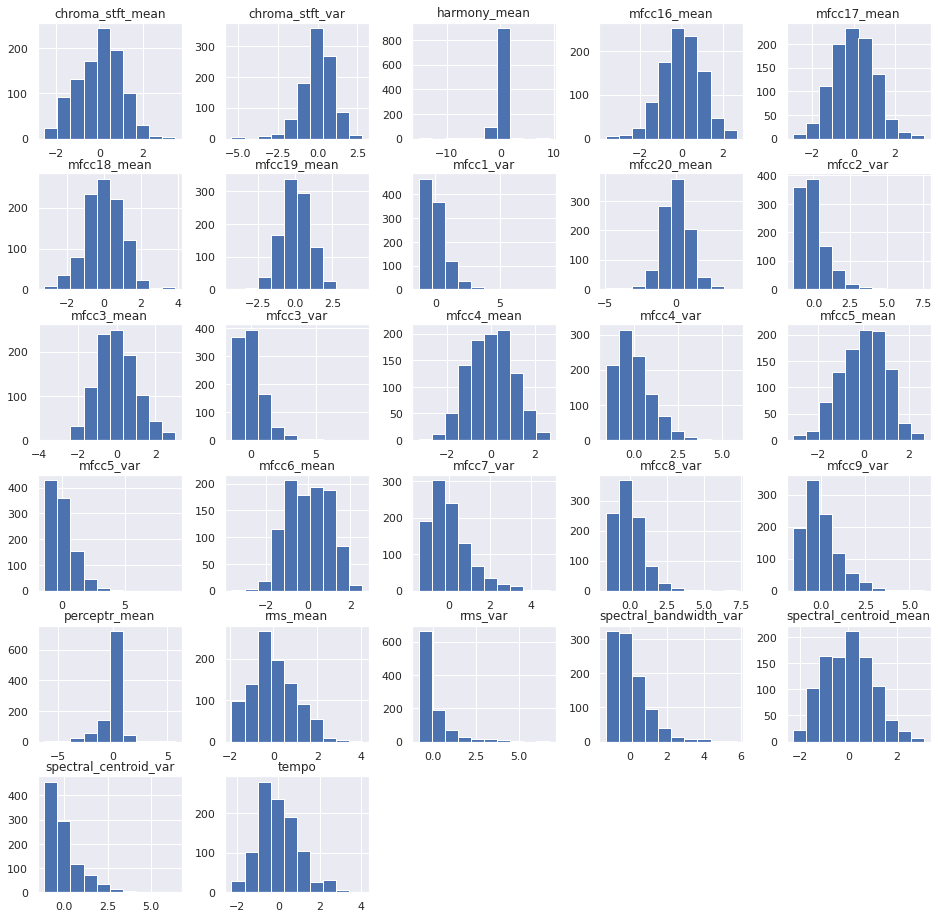

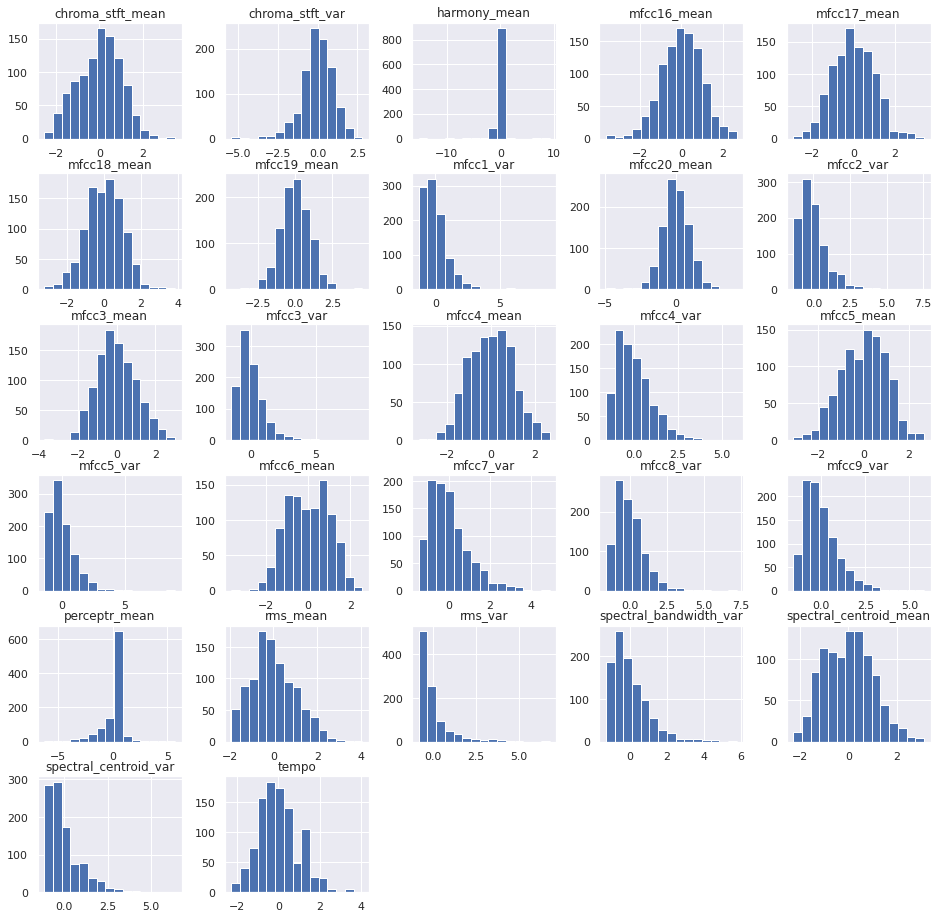

In [ ]:
norm_features.hist(column=norm_features.columns, bins=10)
norm_features.hist(column=norm_features.columns, bins=15)

## Discretizing the Features

In [ ]:
bins = 15
labels = list(range(1,bins+1))
discretized_features = norm_features.apply(pd.cut, bins=bins, labels=labels)
discretized_features

,chroma_stft_mean,chroma_stft_var,harmony_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc1_var,mfcc20_mean,mfcc2_var,...,mfcc7_var,mfcc8_var,mfcc9_var,perceptr_mean,rms_mean,rms_var,spectral_bandwidth_var,spectral_centroid_mean,spectral_centroid_var,tempo
0,6,11,10,9,9,7,8,2,9,1,...,2,2,3,9,5,2,2,5,1,6
1,6,12,10,9,9,7,9,5,9,2,...,7,5,8,9,4,2,5,4,2,2
2,6,10,10,10,5,6,7,2,8,2,...,4,4,3,9,7,2,2,4,1,9
3,8,12,10,9,8,7,9,3,8,2,...,6,3,4,9,6,4,4,2,1,1
4,5,11,10,6,7,7,7,3,4,3,...,3,5,6,9,4,2,2,5,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,9,10,9,3,8,6,2,8,2,...,3,1,3,9,3,1,2,6,2,5
996,7,8,10,10,4,8,5,2,8,1,...,2,1,1,9,3,1,2,6,1,6
997,8,8,10,10,3,9,3,1,8,2,...,2,1,1,9,3,1,2,6,2,7
998,6,12,10,7,7,8,7,6,7,2,...,4,4,3,9,4,1,3,4,2,2


## Splitting the Dataset 

In [ ]:
genres = ["blues",
          "classical",
          "country",
          "disco",
          "hiphop",
          "jazz",
          "metal",
          "pop",
          "reggae",
          "rock"]

percentage = 80

x_train = pd.DataFrame()
x_val = pd.DataFrame()

discretized_features["label"] = features["label"]

for genre in genres:
  genre_df = discretized_features.loc[discretized_features["label"] == genre].copy()
  x_train = x_train.append(genre_df.iloc[:percentage, :])
  x_val = x_val.append(genre_df.iloc[percentage:, :])

## Building the Model

In [ ]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    df = df[df[Y]==label] # Get only the rows with the correct label
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)  # Calculate the ratio of rows with the correct feature value to the total number of rows
    return p_x_given_y

def categorical_naive_bayes(df, X, Y):
  prior = 0.1 # Since there are an equal number of each label, the prior is constant
  features = list(df.columns)[:-1]  # Column names
  Y_pred = []   # List to hold all the predictions
  # loop over every data sample
  for x in X:
      # calculate likelihood
      labels = sorted(list(df[Y].unique())) # Get all the labels
      likelihood = [1]*len(labels)  # List to hold all the likelihoods
      for j in range(len(labels)):  # Go through all the labels
          for i in range(len(features)):    # Go through all the features
              likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])    # Calculate the value of P(feature|label)

      # calculate posterior probability (numerator only)
      post_prob = [1]*len(labels)
      for j in range(len(labels)):  # calculate the highest probability and store as prediction
          post_prob[j] = likelihood[j] * prior
      Y_pred.append(np.argmax(post_prob))

  return np.array(Y_pred) 


## Model Prediction

In [ ]:
X_test = x_val.iloc[:,:-1].values 
Y_test = x_val.iloc[:,-1:].values
for i, genre in enumerate(genres):
  for j in range(len(Y_test)):
    if Y_test[j] == genre:
      Y_test[j] = i
Y_test = np.array([e[0] for e in Y_test])
Y_test = np.array(Y_test)
Y_pred = categorical_naive_bayes(x_train, X=X_test, Y="label")
Y_pred


array([0, 6, 9, 6, 6, 8, 8, 8, 2, 0, 8, 5, 0, 5, 8, 2, 1, 0, 6, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 5, 0, 5, 1, 1, 9, 1, 0, 1, 8, 2, 3, 2,
       0, 2, 2, 2, 2, 8, 9, 8, 6, 2, 2, 0, 2, 2, 9, 9, 9, 8, 4, 8, 8, 0,
       3, 3, 6, 9, 3, 3, 9, 3, 6, 8, 9, 6, 3, 3, 4, 8, 8, 3, 0, 3, 8, 8,
       6, 6, 6, 6, 0, 0, 8, 6, 5, 6, 6, 0, 5, 9, 3, 3, 5, 2, 7, 4, 5, 2,
       5, 0, 2, 5, 5, 5, 2, 5, 5, 5, 6, 6, 6, 9, 6, 9, 6, 6, 0, 0, 9, 6,
       9, 6, 6, 6, 0, 9, 0, 6, 7, 2, 3, 7, 0, 8, 3, 7, 7, 7, 7, 7, 7, 7,
       7, 4, 7, 0, 7, 0, 7, 0, 0, 8, 9, 0, 0, 7, 7, 0, 7, 8, 8, 4, 2, 3,
       0, 5, 3, 9, 9, 9, 6, 6, 9, 2, 8, 6, 9, 2, 0, 6, 0, 9, 6, 5, 6, 0,
       5, 9])

## Model Evaluation

In [ ]:
print(f"Accuracy = {sum(Y_test == Y_pred)/len(Y_pred)}")

0.38581753422053294
Accuracy = 0.38


# Test with 3 Second Features

## Loading the Dataset

In [ ]:
file_path = "/content/drive/MyDrive/Spring Semester 2021-2022/ECE 4424 - Machine Learning/Final Project/Data/features_3_sec.csv"
features3 = pd.read_csv(file_path)

## Viewing the Correlation of the Data

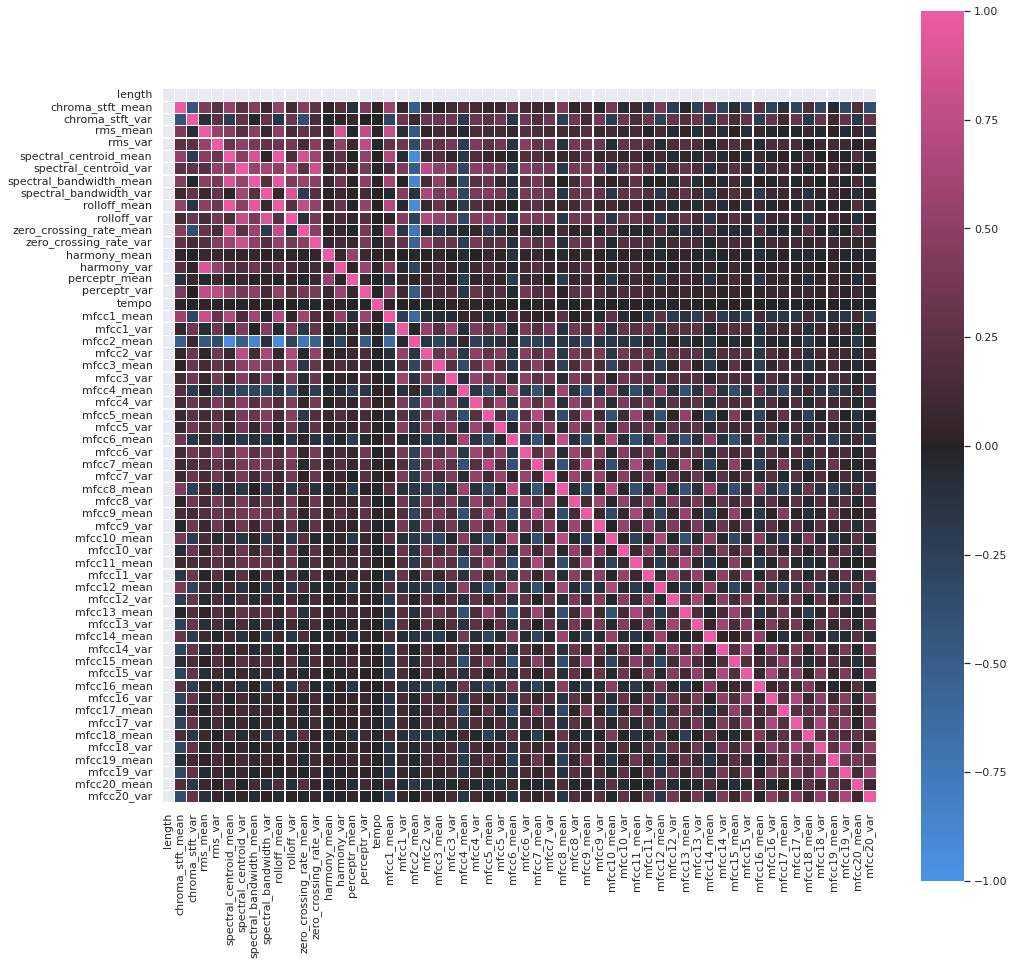

In [ ]:
corr = features3.corr(method="pearson")
cmap = sns.diverging_palette(250, 345, 80, 60, center="dark", as_cmap=True)
sns.set(rc = {'figure.figsize':(16,16)})
sns.heatmap(corr, vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=.2)

## Dropping Strongly Correlated Features

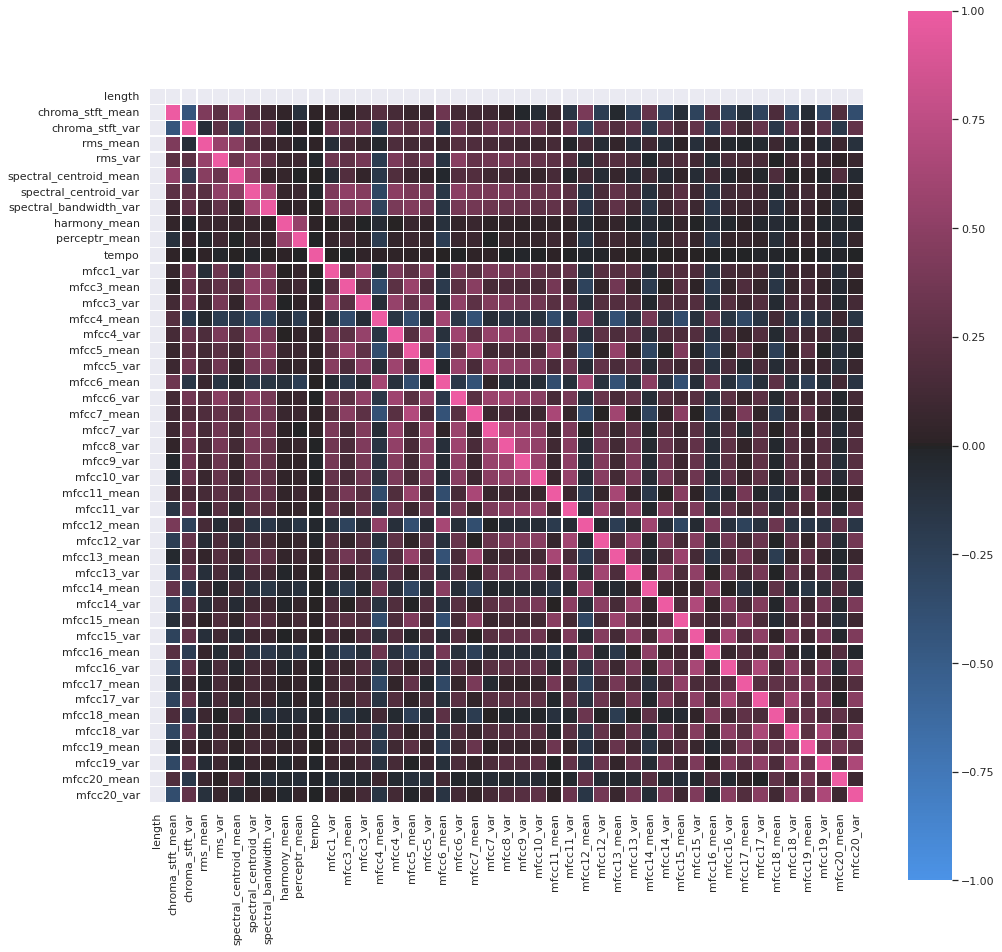

In [ ]:
threshold = 0.7

corr_matrix = features3.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
updated_features3 = features3.drop(columns=to_drop, axis=1)
corr = updated_features3.corr(method="pearson")
sns.heatmap(corr, vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=.2)

## Normalizing the Features

In [ ]:
norm_features3 = updated_features3.copy()
norm_features3 = (norm_features3 - norm_features3.mean()) / norm_features3.std()
norm_features3.drop(columns=["filename", "label", "length"], inplace=True)
norm_features3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,chroma_stft_mean,chroma_stft_var,harmony_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,...,mfcc7_var,mfcc8_var,mfcc9_var,perceptr_mean,rms_mean,rms_var,spectral_bandwidth_var,spectral_centroid_mean,spectral_centroid_var,tempo
0,-0.487783,0.640488,0.168377,0.673543,-0.409672,0.071042,0.693829,-0.338486,0.070759,-0.642325,...,-0.889243,0.207607,0.204053,0.295480,-0.006624,0.235556,-0.009229,-0.566800,-0.572762,0.131002
1,-0.403122,0.131828,0.156335,-0.300539,-0.668492,-0.234688,0.424250,-0.456966,-0.354944,-0.736347,...,-0.017412,-0.367185,-0.134974,0.263721,-0.264931,-0.342116,-0.518984,-0.508772,-0.749825,-0.055933
2,-0.361676,0.764453,0.175934,-0.789365,-0.190163,-0.395368,0.914647,-0.566166,0.071311,-0.458934,...,-0.140163,-0.425905,1.028312,0.415732,0.016694,0.542168,-0.425713,-0.546218,-0.701817,-0.055933
3,-0.175705,0.205467,0.206464,-0.651020,-0.785652,-0.131090,0.720992,-0.498610,0.115469,0.100272,...,-0.451165,-0.001006,-0.009853,0.373484,0.024884,-0.063817,-0.348863,-0.723446,-0.700564,-0.055933
4,-0.485870,0.337504,0.238413,-0.238458,0.091032,-0.218369,1.601061,-0.388476,-0.069423,-0.296955,...,-0.762853,-0.461017,0.469266,0.261340,0.181336,-0.272059,-0.572934,-0.756208,-0.774788,-0.055933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,-0.336125,-0.452533,0.194336,-0.912313,0.480192,-0.828995,0.602946,-0.301536,-1.616598,-0.166039,...,-0.696928,-0.441305,-0.870662,0.338846,-1.179362,-0.719264,-0.319086,-0.931205,-0.580291,-0.055933
9986,-0.077044,-0.233521,0.198694,0.564532,0.202646,-0.761733,0.869261,-0.473447,-2.007710,-0.479410,...,-0.417304,-0.282560,-0.744529,0.316163,-1.064436,-0.721967,-0.182970,-0.467180,-0.311790,-1.261965
9987,-0.354313,0.429953,0.223323,-0.010094,0.652282,0.696934,0.259619,-0.642146,-1.121666,-0.791852,...,0.345917,1.255489,-0.805916,0.330502,-1.144587,-0.550846,0.202187,-1.134601,0.566215,-0.055933
9988,0.088357,-0.006301,0.216953,-0.861905,-0.254238,-0.875465,1.047013,-0.886742,-1.333922,-1.078191,...,-0.463919,0.778283,-1.051020,0.313515,-0.939949,-0.657040,-0.941388,-0.152560,-0.489193,-0.055933


## Visualizing Feature Histograms to Best Discretize the Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facd713efd0>,
      dtype=object)

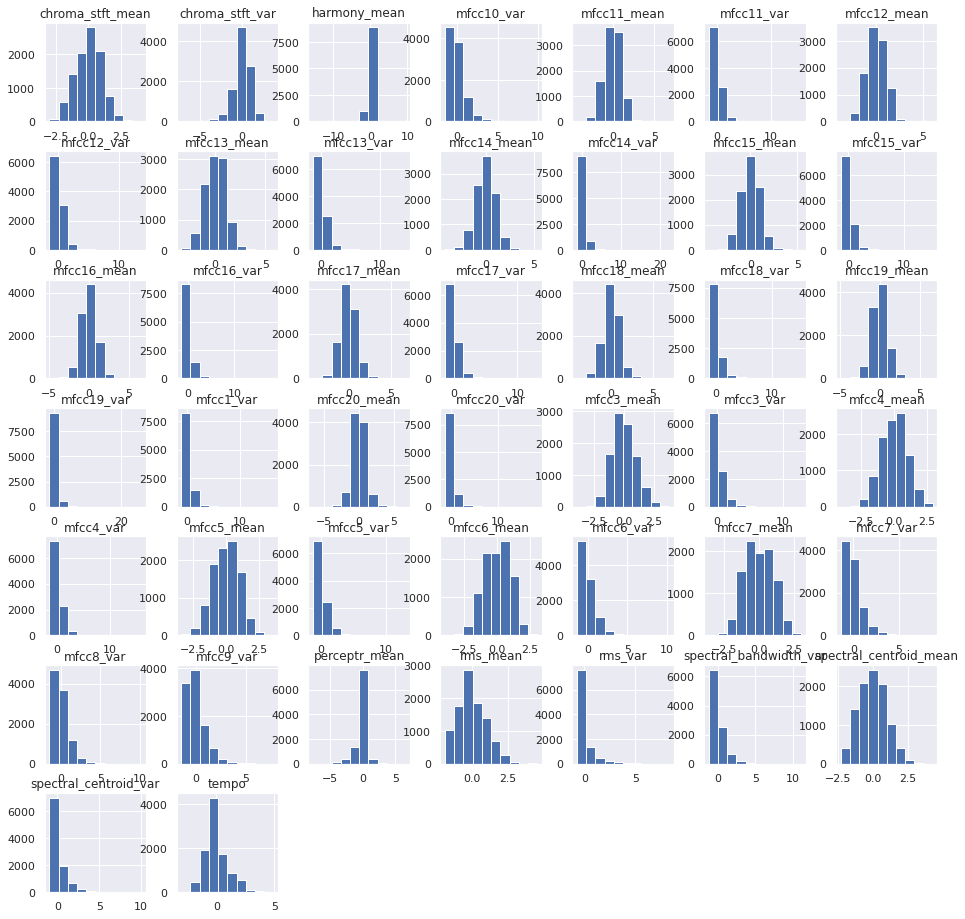

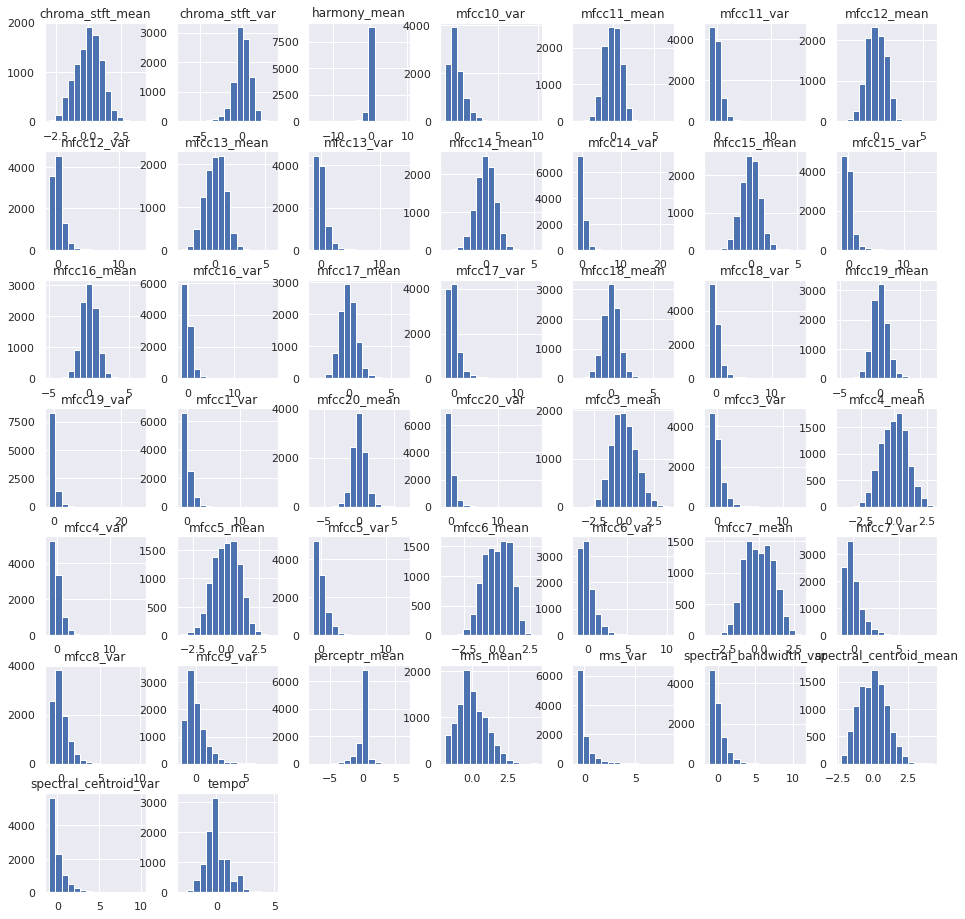

In [ ]:
norm_features3.hist(column=norm_features3.columns, bins=10)
norm_features3.hist(column=norm_features3.columns, bins=15)

## Discretizing the Features

In [ ]:
bins = 15
labels = list(range(1,bins+1))
discretized_features3 = norm_features3.apply(pd.cut, bins=bins, labels=labels)
discretized_features3

,chroma_stft_mean,chroma_stft_var,harmony_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,...,mfcc7_var,mfcc8_var,mfcc9_var,perceptr_mean,rms_mean,rms_var,spectral_bandwidth_var,spectral_centroid_mean,spectral_centroid_var,tempo
0,6,11,10,3,6,2,7,2,6,1,...,1,3,3,9,5,2,2,4,1,6
1,6,11,10,2,5,2,7,2,5,1,...,3,2,3,9,4,1,1,5,1,6
2,6,11,10,1,6,1,8,1,6,1,...,2,2,5,9,5,3,1,4,1,6
3,6,11,10,2,5,2,7,1,6,2,...,2,2,3,9,5,2,1,4,1,6
4,6,11,10,2,6,2,9,2,6,2,...,1,2,4,9,5,1,1,4,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,6,10,10,1,7,1,7,2,3,2,...,2,2,1,9,2,1,2,4,1,6
9986,7,10,10,3,7,1,8,1,3,1,...,2,2,2,9,2,1,2,5,1,4
9987,6,11,10,2,7,2,7,1,4,1,...,3,4,2,9,2,1,2,3,3,6
9988,7,10,10,1,6,1,8,1,4,1,...,2,3,1,9,3,1,1,5,1,6


## Splitting the Dataset

In [ ]:
genres = ["blues",
          "classical",
          "country",
          "disco",
          "hiphop",
          "jazz",
          "metal",
          "pop",
          "reggae",
          "rock"]

percentage = 0.8

x_train = pd.DataFrame()
x_val = pd.DataFrame()

discretized_features3["label"] = features3["label"]

for genre in genres:
  genre_df = discretized_features3.loc[discretized_features3["label"] == genre].copy()
  x_train = x_train.append(genre_df.iloc[:int(percentage * len(genre_df)), :])
  x_val = x_val.append(genre_df.iloc[int(percentage * len(genre_df)):, :])

## Model Prediction

In [ ]:
X_test = x_val.iloc[:,:-1].values 
Y_test = x_val.iloc[:,-1:].values
for i, genre in enumerate(genres):
  for j in range(len(Y_test)):
    if Y_test[j] == genre:
      Y_test[j] = i
Y_test = np.array([e[0] for e in Y_test])
Y_test = np.array(Y_test)
Y_pred = categorical_naive_bayes(x_train, X=X_test, Y="label")


array([0, 0, 9, ..., 9, 6, 9])

## Model Evaluation

In [ ]:
print(f"Accuracy = {sum(Y_test == Y_pred)/len(Y_pred)}")

0.36130967270135184
Accuracy = 0.373
